In [1]:
# import Libraries
import pandas as pd
import numpy as np                   #numerical values
import matplotlib.pyplot as plt      #data visualization
import seaborn as sns

In [3]:
# Load the dataset
train_data = pd.read_csv("/content/train.csv")

In [ ]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data[['Fare','Age']]

,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0
...,...,...
886,13.0000,27.0
887,30.0000,19.0
888,23.4500,NaN
889,30.0000,26.0


In [9]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

/tmp/ipython-input-182476827.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)


In [11]:
train_data.drop(columns=['Cabin'],inplace=True)

In [12]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-4004609572.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)


In [13]:
train_data.Survived.value_counts()

,count
Survived,
0,549
1,342


In [14]:
survived_count = train_data.Survived.value_counts()

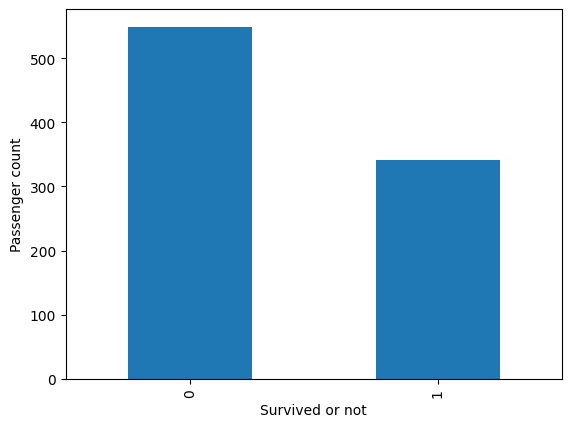

In [15]:
survived_count.plot(kind='bar', alpha=1.0)
plt.xlabel('Survived or not')
plt.ylabel('Passenger count')
plt.show()

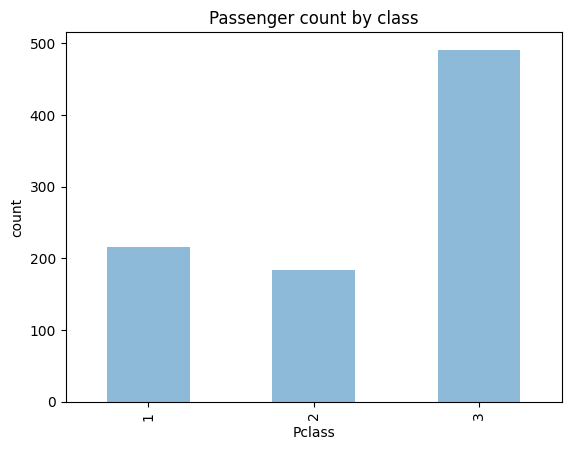

In [16]:
pclass = train_data.Pclass.value_counts()
pclass.sort_index().plot(kind='bar', alpha=.5, title='Passenger count by class')
plt.xlabel('Pclass')
plt.ylabel('count')
plt.show()

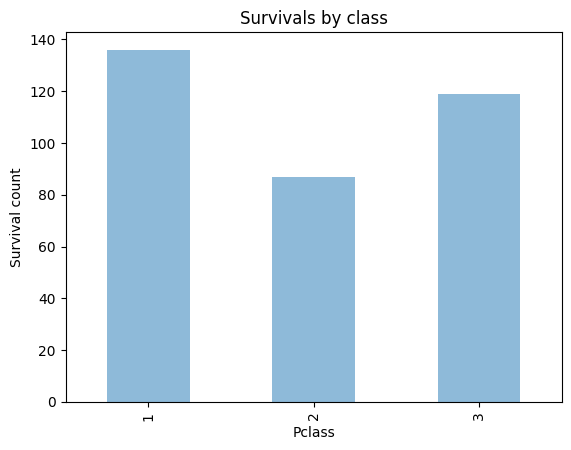

In [17]:
Survivals = train_data[['Pclass','Survived']].groupby('Pclass').sum()
Survivals.Survived.plot(kind='bar', alpha=.5, title='Survivals by class')
plt.xlabel('Pclass')
plt.ylabel('Survival count')
plt.show()

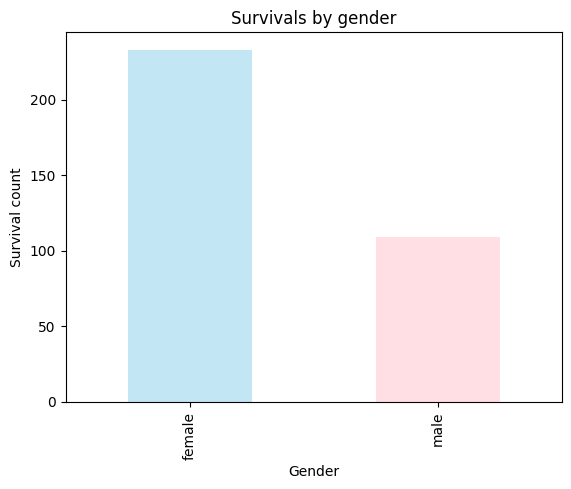

In [18]:
Survivals_gender = train_data[['Sex','Survived']].groupby('Sex').sum()
Survivals_gender.Survived.plot(kind='bar', alpha=.5,color=['skyblue','pink'])
plt.xlabel('Gender')
plt.ylabel('Survival count')
plt.title('Survivals by gender')
plt.show()

In [19]:
Survivals_gender

,Survived
Sex,
female,233
male,109


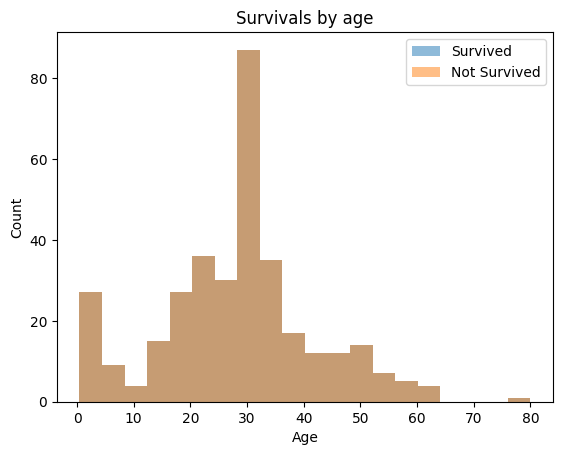

In [20]:
train_data[train_data['Survived']==1]['Age'].plot(kind='hist', bins=20, alpha=.5, label='Survived')
train_data[train_data['Survived']==1]['Age'].plot(kind='hist', bins=20, alpha=.5, label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survivals by age')
plt.legend()
plt.show()

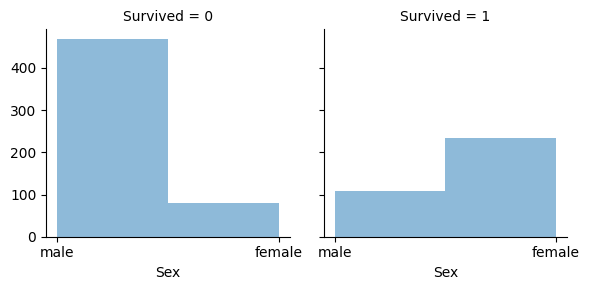

In [21]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Sex', alpha=.5, bins=2)
plt.show()